In [251]:
# Import dependencies here

import json
import requests
from pprint import pprint
from datetime import datetime
import sys
from citipy import citipy
import openweathermapy as owm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [252]:
# configure OpenWeatherMap API key
api_key = "43e2461431e6813de8f6e1f5935fbc78"

In [253]:
# Randomly fetch cities from the entire range of latitude and longitude

lat_range = np.random.uniform(low=-90, high=90, size=1500)
lng_range = np.random.uniform(low=-180, high=180, size=1500)

cities_coordinates = {}
for i in range(len(lat_range)): 
    lat = lat_range[i]
    lng = lng_range[i]
    city = citipy.nearest_city(lat, lng)
    city_str = f"{city.city_name.title()},{city.country_code.upper()}"
    if city_str in cities_coordinates:
        # continue to next coordinates if duplicate is found at same axis
        continue
    cities_coordinates[city_str] = ["%0.2f" % lat, "%0.2f" % lng]

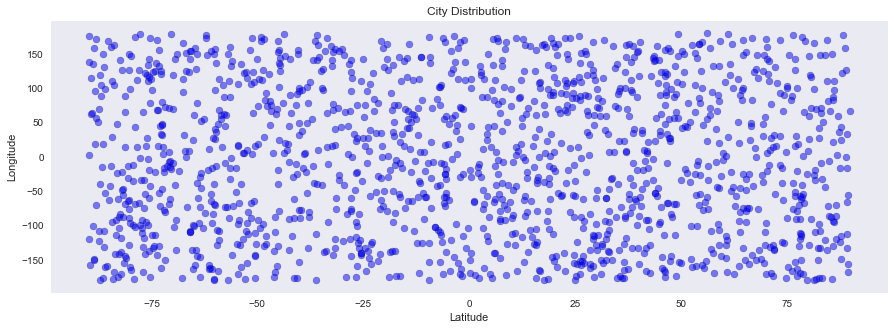

In [254]:
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(lat_range, lng_range,marker='o',color='Blue',edgecolor='Black',alpha=0.5)
plt.title("City Distribution")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [255]:
cities_weather_report = {
    'City': [],
    'Country': [],
    'Latitude': [],
    'Longitue': [],
    'Date': [],
    'Cloudiness': [],
    'Humidity': [],
    'Max Temp': [],
    'Wind Speed': []
}

# OpenWeatherMap URL
owm_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

counter = 1
number_of_records = 500

print("Beginning Data Retrieval")
print("-----------------------------")

for i in cities_coordinates.keys():
    
    # split key into city and country
    city, country = i.split(',')

    print(f"Processing Record {counter} of Set {number_of_records} | {city}")

    # Build query URL
    weather_query = owm_url + "&appid=" + api_key + "&q=" + city
    try:
        print(weather_query)
        response = requests.get(weather_query)
        weather_report = response.json()
    
        # continue to next city if OpenWeatherMap failed to locate it
        if not response.ok:
            continue
        
        # fetch city, count, latitude and longitude data
        cities_weather_report['City'].append(city)
        cities_weather_report['Country'].append(country)
        cities_weather_report['Latitude'].append(cities_coordinates[i][0])
        cities_weather_report['Longitue'].append(cities_coordinates[i][1])
        
        # fetch date and convert it to readable format
        date = datetime.fromtimestamp(weather_report['dt']).strftime('%m/%d/%Y')
        cities_weather_report['Date'].append(date)
        
        # fetch cloudiness
        cities_weather_report['Cloudiness'].append(weather_report['clouds']['all'])
        
        # fetch humidity
        cities_weather_report['Humidity'].append(weather_report['main']['humidity'])

        # fetch max teperature
        cities_weather_report['Max Temp'].append(weather_report['main']['temp_max'])

        # fetch wind speed
        cities_weather_report['Wind Speed'].append(weather_report['wind']['speed'])
        
        if counter == number_of_records:
            break
        counter += 1
        
    except ConnectionError as e:
        print(f"Failed to make request due to : {e}")
    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

cities_weather_report_df = pd.DataFrame(cities_weather_report)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 500 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Codrington
Processing Record 2 of Set 500 | Waterloo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Waterloo
Processing Record 3 of Set 500 | Mayfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Mayfield
Processing Record 4 of Set 500 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tuktoyaktuk
Processing Record 5 of Set 500 | Saiha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Saiha
Processing Record 6 of Set 500 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Yellowknife
Processing 

Processing Record 51 of Set 500 | Barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Barentsburg
Processing Record 51 of Set 500 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Cape Town
Processing Record 52 of Set 500 | Merzifon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Merzifon
Processing Record 53 of Set 500 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Vaini
Processing Record 54 of Set 500 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Port Elizabeth
Processing Record 55 of Set 500 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Mayo
Processing Record 56 of Set 500 | Bogo
http://api.openweathermap

Processing Record 97 of Set 500 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Dingle
Processing Record 98 of Set 500 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=New Norfolk
Processing Record 99 of Set 500 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Nabire
Processing Record 100 of Set 500 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Adrar
Processing Record 101 of Set 500 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=College
Processing Record 102 of Set 500 | Jaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Jaque
Processing Record 102 of Set 500 | Puquio
http://api.openweathermap.org/data/2.5/we

Processing Record 145 of Set 500 | Barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Barcelos
Processing Record 146 of Set 500 | Kaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Kaka
Processing Record 147 of Set 500 | Chapleau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Chapleau
Processing Record 148 of Set 500 | Falesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Falesti
Processing Record 149 of Set 500 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Kieta
Processing Record 150 of Set 500 | Zamora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Zamora
Processing Record 151 of Set 500 | Amderma
http://api.openweathermap.org/data/2.5/we

Processing Record 191 of Set 500 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Esperance
Processing Record 192 of Set 500 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Hilo
Processing Record 193 of Set 500 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Atuona
Processing Record 194 of Set 500 | Khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Khash
Processing Record 195 of Set 500 | Yefira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Yefira
Processing Record 195 of Set 500 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Kavieng
Processing Record 196 of Set 500 | Kushiro
http://api.openweathermap.org/data/2.5/weat

Processing Record 234 of Set 500 | Bull Savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Bull Savanna
Processing Record 235 of Set 500 | Ranot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Ranot
Processing Record 236 of Set 500 | Kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Kapit
Processing Record 237 of Set 500 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Dunedin
Processing Record 238 of Set 500 | Condega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Condega
Processing Record 239 of Set 500 | Iwanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Iwanai
Processing Record 240 of Set 500 | La Ronge
http://api.openweathermap.org/da

Processing Record 282 of Set 500 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Henties Bay
Processing Record 283 of Set 500 | Porto Belo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Porto Belo
Processing Record 284 of Set 500 | Ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Ballina
Processing Record 285 of Set 500 | Horsham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Horsham
Processing Record 286 of Set 500 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Nelson Bay
Processing Record 287 of Set 500 | Enugu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Enugu
Processing Record 288 of Set 500 | Provideniya
http://api.op

Processing Record 334 of Set 500 | Nekhayevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Nekhayevskiy
Processing Record 335 of Set 500 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Bandarbeyla
Processing Record 336 of Set 500 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=San Cristobal
Processing Record 337 of Set 500 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Mount Isa
Processing Record 338 of Set 500 | Jimma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Jimma
Processing Record 339 of Set 500 | Moussoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Moussoro
Processing Record 340 of Set 500 | Hillsboro

Processing Record 380 of Set 500 | Tacuati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tacuati
Processing Record 381 of Set 500 | Rudnya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Rudnya
Processing Record 382 of Set 500 | Huron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Huron
Processing Record 383 of Set 500 | Kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Kamenskoye
Processing Record 383 of Set 500 | Stornoway
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Stornoway
Processing Record 383 of Set 500 | Vikulovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Vikulovo
Processing Record 384 of Set 500 | Qaqortoq
http://api.openweathermap.

Processing Record 425 of Set 500 | Suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Suntar
Processing Record 426 of Set 500 | San Rafael Del Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=San Rafael Del Sur
Processing Record 427 of Set 500 | Ganzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Ganzhou
Processing Record 428 of Set 500 | Formoso Do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Formoso Do Araguaia
Processing Record 428 of Set 500 | San Matias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=San Matias
Processing Record 429 of Set 500 | Caconda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Caconda
Processing Record 430 of S

Processing Record 471 of Set 500 | Athens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Athens
Processing Record 472 of Set 500 | Keti Bandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Keti Bandar
Processing Record 473 of Set 500 | Sanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Sanda
Processing Record 474 of Set 500 | Nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Nishihara
Processing Record 475 of Set 500 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Goderich
Processing Record 476 of Set 500 | Mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Mangan
Processing Record 477 of Set 500 | Nsoko
http://api.openweathermap.org

In [256]:
cities_weather_report_df = cities_weather_report_df.dropna(how='any')
cities_weather_report_df.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitue      500
Max Temp      500
Wind Speed    500
dtype: int64

In [257]:
cities_weather_report_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitue,Max Temp,Wind Speed
0,Codrington,100,AG,03/20/2018,99,20.98,-51.89,67.76,5.50
1,Waterloo,1,CA,03/20/2018,31,45.28,-72.48,33.80,16.11
2,Mayfield,0,US,03/20/2018,83,36.90,-88.79,35.60,9.17
3,Tuktoyaktuk,40,CA,03/20/2018,76,71.93,-134.02,1.40,3.36
4,Saiha,8,IN,03/20/2018,85,21.68,93.36,59.66,1.70


In [258]:
# write dataframe to CSV file
cities_weather_report_df.to_csv("CitiesWeatherReport.csv", sep=',', encoding='utf-8')

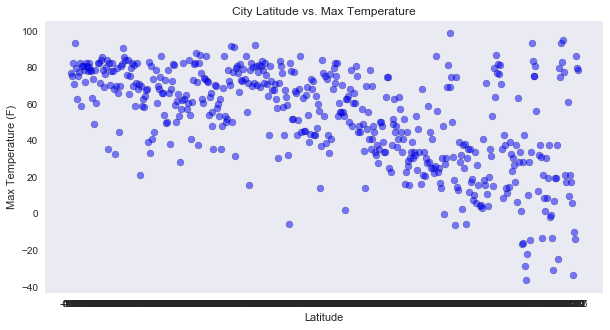

In [259]:
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(cities_weather_report_df['Latitude'], cities_weather_report_df['Max Temp'], marker='o', color='Blue',edgecolor='Black',alpha=0.5)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('City_Latitude_vs_MaxTemp.png')
plt.show()

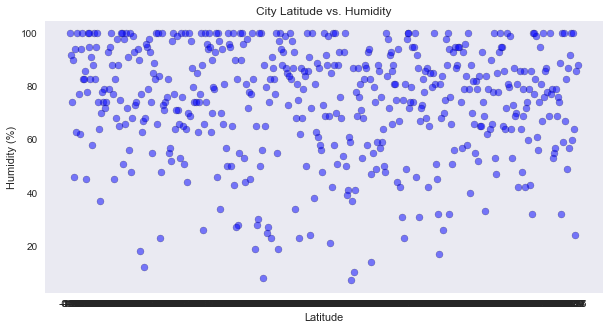

In [260]:
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(cities_weather_report_df['Latitude'], cities_weather_report_df['Humidity'],marker='o', color='Blue',edgecolor='Black',alpha=0.5)
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('City_Latitude_vs_Humidity.png')
plt.show()

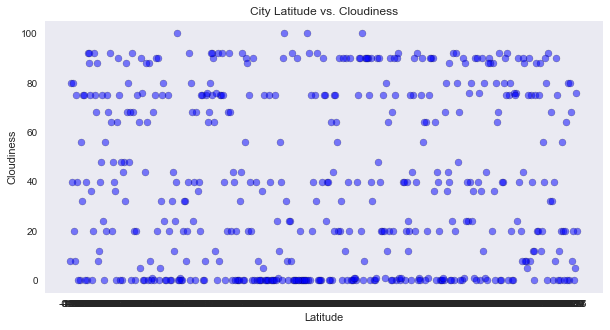

In [261]:
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(cities_weather_report_df['Latitude'], cities_weather_report_df['Cloudiness'],marker='o',color='Blue',edgecolor='Black',alpha=0.5)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('City_Latitude_vs_Cloudiness.png')
plt.show()

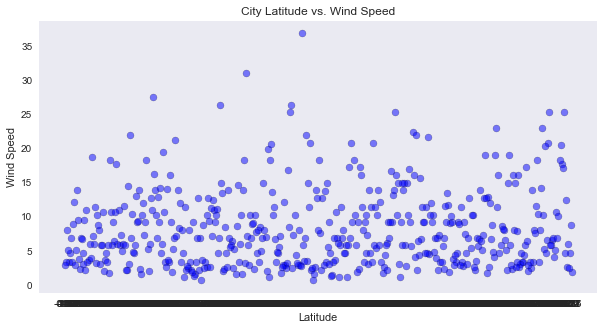

In [262]:
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(cities_weather_report_df['Latitude'], cities_weather_report_df['Wind Speed'],marker='o',color='Blue',edgecolor='Black',alpha=0.5)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('City_Latitude_vs_WindSpeed.png')
plt.show()